In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


##Função de redimencionar imagens

In [0]:
def redimensionaImagem(image, tamanho):
    altura, largura, _ = image.shape
    return cv2.resize(image, (int(altura * tamanho), int(largura * tamanho)))

##Carregando imagem e logo

In [0]:
#caregando o logo

logo = cv2.imread("logo.png")
logo = redimensionaImagem(logo, 0.25)

#carregando a imagem

img = cv2.imread("klysman.jpg")
img = redimensionaImagem(img, 0.8)

##Marcando a posição na onde a logo será inserida

In [0]:
alturaLogo, larguraLogo, _ = logo.shape
regiaoOndeFicaraOLogo = img[0:alturaLogo, 0:larguraLogo]

##Convertando a logo em preto e branco (Mascara)

In [0]:
logoPretoEBranco = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

#limiarização/binarizacao do logo

_, logoBinarizado = cv2.threshold(logoPretoEBranco, 150, 255, cv2.THRESH_BINARY_INV)

logoInvertido = cv2.bitwise_not(logoBinarizado) #Inverte o pixel ( o pixel 0 vira 255 e o 255 vira 0) *Esse recurso só funciona em imagens em tons de cinza

##Seleciondo o local para inserir a logo

In [0]:
fundaNaImagemFinal = cv2.bitwise_and(regiaoOndeFicaraOLogo, regiaoOndeFicaraOLogo, mask = logoInvertido) #Soma de pixel (branco com branco fica branco, preto com branco fica preto)
#Preenche os pixels não pretos com os pixels da imagem de fundo. O pixel branco do logo passa a ser transparente

logoNaImagemFinal = cv2.bitwise_and(logo, logo, mask = logoBinarizado)


##Exibindo as imagens

Logo


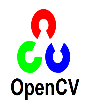

Logo binarizada com fundo preto


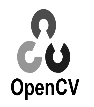

Mascara binarizada com fundo preto 


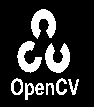

Mascara binarizada com fundo branco


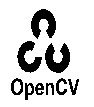

cv2.bitwise_and torna o pixel branco transparente


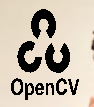

cv2.bitwise_and na logo original


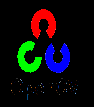

In [18]:
print("Logo")
cv2_imshow(logo)
print("Logo binarizada com fundo preto")
cv2_imshow(logoPretoEBranco)
print("Mascara binarizada com fundo preto ")
cv2_imshow(logoBinarizado)
print("Mascara binarizada com fundo branco")
cv2_imshow(logoInvertido)
print("cv2.bitwise_and torna o pixel branco transparente")
cv2_imshow(fundaNaImagemFinal)
print("cv2.bitwise_and na logo original")
cv2_imshow(logoNaImagemFinal)

##Mesclando logo com a imagem

Região


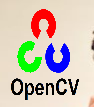

Imagem completa


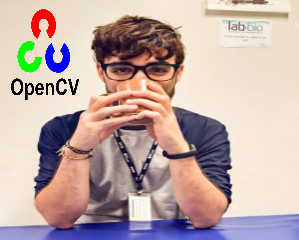

In [26]:
segmentoFinal = cv2.add(logoNaImagemFinal, fundaNaImagemFinal)
print("Região")
cv2_imshow(segmentoFinal)
print("Imagem completa")
img[0:alturaLogo, 0:larguraLogo] = segmentoFinal
cv2_imshow(img)